<img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Nombre y Apellido
#### Christian Yanez
***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin((2\pi.f_0 + \phi_0).k/f_s),\space\space \forall k \in \Bbb{Z} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [11]:

def generador_senoidal (fs, f0, N, a0=1, p0=0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función

    
    
    # fin de la función
    
    return tt, signal


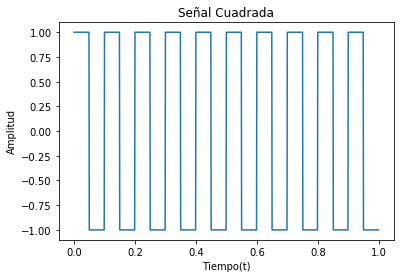

In [12]:
import numpy as np
from scipy import signal as sp
import matplotlib.pyplot as plt

N  = 1000
fs = 1000
a0 = 1
f0=10

t=np.linspace(0.0,(N-1)/fs,N)
funcion = sp.square(2 *np.pi*f0*t)

plt.plot(t, funcion)
plt.title('Señal Cuadrada')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo(t)')

plt.show()


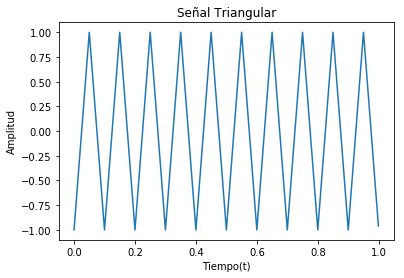

In [13]:

import scipy.signal as signal

N  = 1000
fs = 1000
a0 = 1
f0=10

t=np.linspace(0.0,(N-1)/fs,N)
# simetria de la señal triangular diente de sierra
simetria=0.5

senal = signal.sawtooth(2 * np.pi * f0 * t, simetria)

# SALIDA
plt.plot(t,senal)
plt.title('Señal Triangular')
plt.xlabel('Tiempo(t)')
plt.ylabel('Amplitud')
plt.show()

a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.fftpack as sc
import cmath
import timeit


# Insertar aquí el código para inicializar tu notebook
########################################################
def generador_senoidal (fs, f0, N, a0, p0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """ 
    ts=1/fs        #tiempo de muestreo
    
    tt = np.linspace(0, (N-1)*ts, N).flatten()
      
    x = np.array([], dtype=np.float).reshape(N,0)
    
    aux = a0* np.sin( 2*np.pi*f0*tt + p0 )
    
    x = np.hstack([x, aux.reshape(N,1)] )
    
    signal=x
    
    return tt, signal

In [15]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


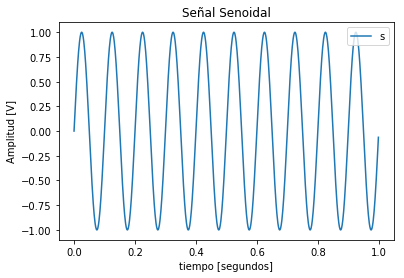

In [16]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt,x=generador_senoidal(fs,f0,N,a0,p0)

plt.figure(1)
line_hdls = plt.plot(tt, x)
plt.title('Señal Senoidal' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
    
# presentar una leyenda para la señal
axes_hdl = plt.gca()
    
axes_hdl.legend(line_hdls, 'signal', loc='upper right'  )
    
plt.show()

¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si, en el eje del tiempo se abarca 1s y en ese tiempo la señal desarrolla 10 ciclos, en consecuencia se establecen 10 ciclos por segundo = 10Hz. 
</div>

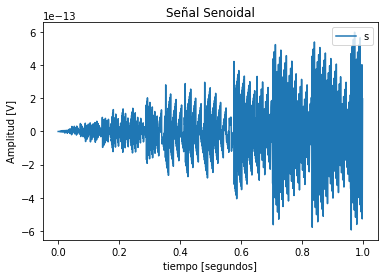

In [17]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt,x=generador_senoidal(fs,f0,N,a0,p0)

plt.figure(1)
line_hdls = plt.plot(tt, x)
plt.title('Señal Senoidal' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
    
# presentar una leyenda para la señal
axes_hdl = plt.gca()
    
axes_hdl.legend(line_hdls, 'signal', loc='upper right'  )
    
plt.show()

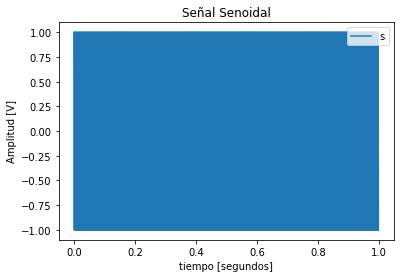

In [18]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt,x=generador_senoidal(fs,f0,N,a0,p0)

plt.figure(1)
line_hdls = plt.plot(tt, x)
plt.title('Señal Senoidal' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
    
# presentar una leyenda para la señal
axes_hdl = plt.gca()
    
axes_hdl.legend(line_hdls, 'signal', loc='upper right'  )
    
plt.show()

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No es posible conocer los parámetros de la senoidal en base a su representación temporal en ninguno de los dos casos.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En ambos casos la frecuencia de la señal es la mitad de la frecuencia de muestreo, lo que deriva en perdida de información ya que solo se cuenta con dos muestras de la señal original.
</div>

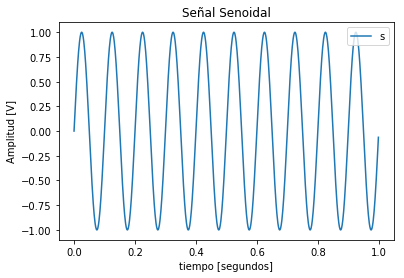

In [19]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt,x=generador_senoidal(fs,f0,N,a0,p0)

plt.figure(1)
line_hdls = plt.plot(tt, x)
plt.title('Señal Senoidal' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
    
# presentar una leyenda para la señal
axes_hdl = plt.gca()
    
axes_hdl.legend(line_hdls, 'signal', loc='upper right'  )
    
plt.show()

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Según su representación temporal, no es posible diferenciar las gráficas.
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La solución radica en la implementación de filtros según el ancho de banda de nuestro interes, en este caso un filtro antialiasing serviría.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

/home/christian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


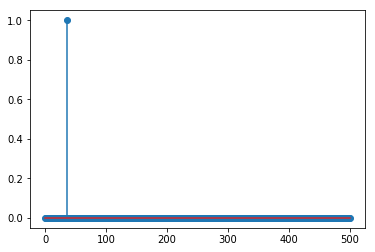

In [20]:
a0 = 1 # Volts
p0 = 0 # radianes
f0 = 35  # Hz

def calculo_dft(input):
    n = len(input)
    output = []
    for k in range(n): 
        s = complex(0)
        for t in range(n):
            angle = 2j * cmath.pi * t * k / n
            s += input[t] * cmath.exp(-angle)
        output.append(s)
    return output

tt,x=generador_senoidal(fs,f0,N,a0,p0)

dft=calculo_dft(x)

spect=(2/N)*np.abs(dft)

frec=np.linspace(0.0,fs/2,N/2)
spec2=spect[:N//2]

plt.stem(frec,spec2)
plt.show()



<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

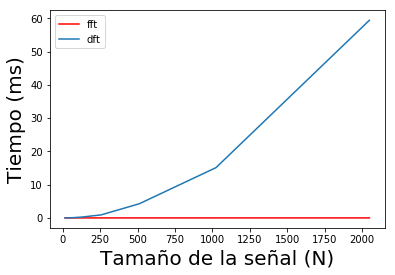

In [21]:
inde=[16,32,64,128,256,512,1024,2048]

def compute_dft_complex(input):
    n = len(input)
    output = []
    for k in range(n):  # For each output element
        s = complex(0)
        for t in range(n):  # For each input element
            angle = 2j * cmath.pi * t * k / n
            s += input[t] * cmath.exp(-angle)
        output.append(s)
    return output

def tiempos_dft(fs, f0, N, a0, p0,tipo):
    ti=[]
    for t in inde:
        time=np.linspace(0.0,(t-1)/fs,t)
        s=np.sin(2*np.pi*f0*time)
        
        if tipo=="dft":
            the_start = timeit.default_timer()
            y1=compute_dft_complex(s)
            the_end = timeit.default_timer()
        elif tipo=="fft":
            the_start = timeit.default_timer()
            y1=sc.fft(s)
            the_end = timeit.default_timer()
            
        tiempo=the_end - the_start
        ti.append(tiempo)
    return ti 

a=tiempos_dft(fs, f0, N, a0, p0,"dft")

b=tiempos_dft(fs, f0, N, a0, p0,"fft")

plt.figure()

plt.plot(inde,b,'r')    
plt.plot(inde,a)

plt.legend(('fft','dft'),loc="upper left")    
plt.xlabel("Tamaño de la señal (N)", fontsize = 20)
plt.ylabel("Tiempo (ms)", fontsize = 20)

plt.show()

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [22]:
import timeit

the_start = timeit.timeit()
print("hello")
the_end = timeit.timeit()
print(the_start - the_end)


hello
-0.0032809859985718504


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [23]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
a=tiempos_dft(fs, f0, N, a0, p0,"dft")

b=tiempos_dft(fs, f0, N, a0, p0,"fft")
#######################################

tus_resultados = [ ['dft'], 
                   [a[0]], # <-- acá debería haber numeritos :)
                   [a[1]], # <-- acá debería haber numeritos :)
                   [a[2]], # <-- acá debería haber numeritos :)
                   [a[3]], # <-- acá debería haber numeritos :)
                   [a[4]], # <-- acá debería haber numeritos :)
                   [a[5]], # <-- acá debería haber numeritos :)
                   [a[6]], # <-- acá debería haber numeritos :)
                   [a[7]]  # <-- acá debería haber numeritos :)
                 ]
tus_resultados2 = [ ['fft'], 
                   [b[0]], # <-- acá debería haber numeritos :)
                   [b[1]], # <-- acá debería haber numeritos :)
                   [b[2]], # <-- acá debería haber numeritos :)
                   [b[3]], # <-- acá debería haber numeritos :)
                   [b[4]], # <-- acá debería haber numeritos :)
                   [b[5]], # <-- acá debería haber numeritos :)
                   [b[6]], # <-- acá debería haber numeritos :)
                   [b[7]]  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['tiempo transcurrido (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
df2 = DataFrame(tus_resultados2, columns=['tiempo transcurrido (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df2.to_html())


,tiempo transcurrido (s)
Tamaño de la señal N,fft
16,5.1891e-05
32,4.0088e-05
64,4.5815e-05
128,4.4768e-05
256,5.0495e-05
512,5.8457e-05
1024,6.9143e-05
2048,0.00012257


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

/home/christian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


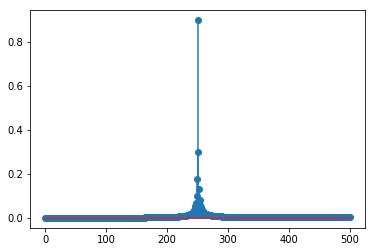

In [34]:

N  = 1000 # muestras
fs = 1000 # Hz
a0 = 1 # Volts
p0 = 0 # radianes
fd = 0.25
f0 = fs/4 +fd  # Hz
#m = 0

def valores(espectro,f):#f=f0
    m=0
    for i in espectro:
        m=m+i**2
   
    cen=espectro[int(f)]**2
    val=( espectro[int(f)],espectro[int(f)+1],m-cen)
    
    return val


t=np.linspace(0.0,(N-1)/fs,N)
s=np.sin(2*np.pi*f0*t)

fft=sc.fft(s)

spect=(2/N)*np.abs(fft)


frec=np.linspace(0.0,fs/2,N/2)
spec2=spect[:N//2]

#tot=valores(spec2)

plt.stem(frec,spec2)
plt.show()


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [45]:
#######################################
# Tu simulación que genere resultados #

######################################

def valores(espectro,f):
    m=0
    for i in espectro:
        m=m+i**2
   
    cen=espectro[int(f)]**2
    val=( espectro[int(f)],espectro[int(f)+100],m-cen)
    
    return val
######################################
fs = 1000 # Hz
N  = 1000 # muestras
fd = 0
f0 = fs/4 +fd  # Hz

t=np.linspace(0.0,(N-1)/fs,N)
s=np.sin(2*np.pi*f0*t)

fft=sc.fft(s)
spect=(2/N)*np.abs(fft)

spec2=spect[:N//2]

tot=valores(spec2,f0)
#######################################
fs = 1000 # Hz
N  = 1000 # muestras
fd = 0.01
f0 = fs/4 +fd  # Hz

t=np.linspace(0.0,(N-1)/fs,N)
s=np.sin(2*np.pi*f0*t)

fft=sc.fft(s)
spect=(2/N)*np.abs(fft)
spec2=spect[:N//2]

tot2=valores(spec2,f0)
#######################################
fs = 1000 # Hz
N  = 1000 # muestras
fd = 0.25
f0 = fs/4 +fd  # Hz

t=np.linspace(0.0,(N-1)/fs,N)
s=np.sin(2*np.pi*f0*t)

fft=sc.fft(s)
spect=(2/N)*np.abs(fft)
spec2=spect[:N//2]

tot3=valores(spec2,f0)
#######################################
fs = 1000 # Hz
N  = 1000 # muestras
fd = 0.5
f0 = fs/4 +fd  # Hz

t=np.linspace(0.0,(N-1)/fs,N)
s=np.sin(2*np.pi*f0*t)

fft=sc.fft(s)
spect=(2/N)*np.abs(fft)
spec2=spect[:N//2]

tot4=valores(spec2,f0)
#######################################

tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  [tot[0], tot[1], tot[2]], # <-- acá debería haber numeritos :)
                  [tot2[0], tot2[1], tot2[2]], # <-- acá debería haber numeritos :)
                  [tot3[0], tot3[1], tot3[2]], # <-- acá debería haber numeritos :)
                  [tot4[0], tot4[1], tot4[2]]  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,1,1.06575e-15,0
$f_S/4+0.01$,0.999834,0.00010884,0.000328943
$f_S/4+0.25$,0.899609,0.00303748,0.189701
$f_S/4+0.5$,0.636618,0.00342087,0.594718


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

/home/christian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


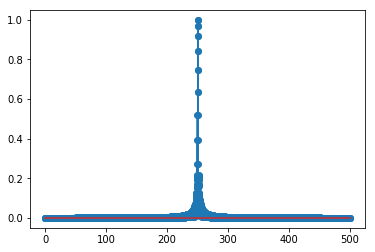

In [26]:
# Inserte aquí su código
N  = 1000 # muestras
fs = 1000 # Hz
a0 = 1 # Volts
p0 = 0 # radianes
fd = 0.5
f0 = fs/4 +fd  # Hz
mj=10*N
Nn=int(N+mj)

def zero_pad(mj):
    mji=np.zeros(int(mj),dtype=float)
    t=np.linspace(0.0,(N-1)/fs,N)
    s=np.sin(2*np.pi*f0*t)

    s1=np.concatenate((s,mji))

    fft=sc.fft(s1)

    spect=(2/N)*np.abs(fft)


    frec=np.linspace(0.0,fs/2,Nn/2)
    spec2=spect[:Nn//2]
    
    return frec,spec2

x,y=zero_pad(mj)

plt.stem(x,y)
plt.show()




**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si, hay cambios en la dispersión del espectro.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La amplitud aumenta considerablemente en los casos criticos, la dispersión del espectro es menor en todos los casos.
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

/home/christian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


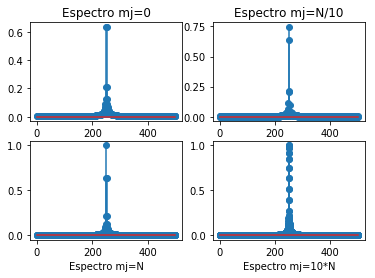

,$e_\%$
0,0.398805
$N/10$,0.344565
$N$,0.100000
$10N$,0.036321


In [59]:
#######################################
# Tu simulación que genere resultados #
N  = 1000 # muestras
fs = 1000 # Hz
a0 = 1 # Volts
p0 = 0 # radianes
fd = 0.5
f0 = fs/4 +fd  # Hz

mj=0
Nn=int(N+mj)

def error(a,b):
    for i in b:
        if i==max(b):
            maximo=i

    h = list(b).index(maximo)
    err=((a[h]-f0)/a[h])*100
    
    return err

a,b=zero_pad(mj)
e1=error(a,b)

mj=N/10
Nn=int(N+mj)

a1,b1=zero_pad(mj)
e2=error(a1,b1)

mj=N
Nn=int(N+mj)

a2,b2=zero_pad(mj)
e3=error(a2,b2)

mj=10*N
Nn=int(N+mj)

a3,b3=zero_pad(mj)
e4=error(a3,b3)

s=plt.subplot(221)
s.stem(a,b)
s.set_title('Espectro mj=0')
s1=plt.subplot(222)
s1.stem(a1,b1)
s1.set_title('Espectro mj=N/10')
s2=plt.subplot(223)
s2.stem(a2,b2)
plt.xlabel('Espectro mj=N')
s3=plt.subplot(224)
s3.stem(a3,b3)
plt.xlabel('Espectro mj=10*N')
plt.show()

#######################################

tus_resultados = [e1, # <-- acá debería haber numeritos :)
                  e2, # <-- acá debería haber numeritos :)
                  e3, # <-- acá debería haber numeritos :)
                  e4 # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())

